In [14]:
def pr(var):
    print(var)

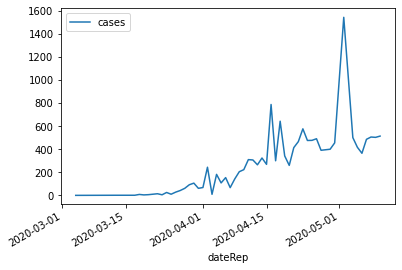

In [18]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

full_df = pd.read_csv("./dataset/covid-19-coronavirus-data.csv")
df_ua = full_df.loc[((full_df['countriesAndTerritories'] == 'Ukraine') 
                & (full_df['cases'] != 0)), ['dateRep', 'cases', 'deaths']]

df_ua = df_ua.copy( )
df_ua['dateRep'] = pd.to_datetime(df_ua['dateRep'], dayfirst=True)
df_ua['numDate'] = [mdates.date2num(date) for date in df_ua['dateRep']]

# df_ua = df_ua.sort_values(by=['dateRep'], ascending=True)
df_ua.plot(x='dateRep', y='cases')

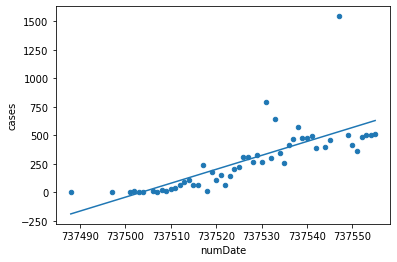

In [19]:
# time is not cause; just to show trend
func = np.poly1d(np.polyfit(df_ua['numDate'], df_ua['cases'], 1))

from matplotlib import pyplot as plt
df_ua.plot(kind='scatter', x='numDate', y='cases')
plt.plot(df_ua['numDate'], func(df_ua['numDate']))
plt.show()

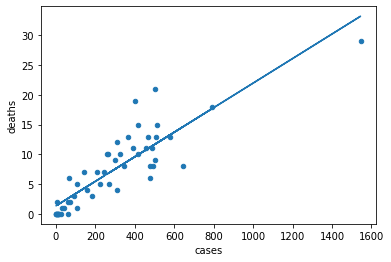

In [20]:
# more sense and 'true' correlation for cases+deaths
from scipy import stats
m, b, r, _, _ = stats.linregress(df_ua['cases'], df_ua['deaths'])
df_ua['f(x)'] = (m*df_ua['cases']) + b

df_ua.plot(kind='scatter', x='cases', y='deaths')
plt.plot(df_ua['cases'], df_ua['f(x)'])
plt.show()